# **Neural Nets 2**

___
# **Task : Language Modelling**

Outcome :
___
1. Understanding the Concept of Neural Language Model

## Load the data
---

In [2]:
# Load this library
import numpy as np
import pandas as pd


import math
import os
import re
from typing import Tuple

import torch
import torch.nn.functional as F
from torch import nn, Tensor

from torchtext import datasets

from tqdm import tqdm
import time


import matplotlib.pyplot as plt

/home/ubuntu/learning/natural-language-processing/.venv/lib/python3.10/site-packages/torchtext/datasets/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/ubuntu/learning/natural-language-processing/.venv/lib/python3.10/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


Load the data from given data path

In [3]:
news_data_path = '../data/artikel_katadata_medium.csv'
news_data = pd.read_csv(news_data_path).values.tolist()

In [5]:
news_data[0]

['Anak usaha Alibaba\t Ant Group mencatatkan penurunan laba 37% pada kuartal yang berakhir Maret\t dibandingkan kuartal sebelumnya. Ini terjadi di saat Tiongkok mengeluarkan sejumlah aturan baru terkait perusahaan teknologi. Berdasarkan laporan keuangan perusahaan\t Ant Group mencatatkan laba US$ 2\t1 miliar atau Rp 30 triliun pada kuartal pertama. Raksasa teknologi finansial (fintech) ini menyumbang hampir US$ 696 juta atau Rp 9\t"9 triliun untuk pendapatan Alibaba. Alibaba mempunyai sepertiga saham di Ant Group. ""Berarti laba turun 37% dari tiga bulan sebelumnya"\t" demikian dikutip dari Bloomberg, Selasa (3/8). Analis menilai, laba Ant Group turun karena tantangan dari tindakan keras pemerintah Tiongkok. Beijing sempat meminta Ant Group merombak bisnis, menjadi hanya berfokus pada layanan pembayaran. Itu karena Beijing khawatir dengan pertumbuhan Ant Group yang sangat cepat. Utamanya, pada sektor pinjam-meminjam, asuransi, dan investasi. Regulator Tiongkok juga mengeluarkan serangk

In [6]:
sentences = []
for news in news_data :
  splitted_news = news[0].split('.')
  for splitted in splitted_news :
      sentences.append(splitted)

Yes, we have some duplicated data. Let's see the duplicated data.

## Create load function
---

Finally, we can create load data function

In [7]:
def load_news_data(data_path):
    """
    Function to load news data
        & removing duplicate data on news  data

    Parameters
    ----------
    data_path : str
        news  data path

    Returns
    -------
    news_data : pandas DataFrame
        Indonesian news data
    """
    # Load data
    news_data = pd.read_csv(news_data_path).values.tolist()

    # extract into sentences level
    sentences = []
    for news in tqdm(news_data) :
      splitted_news = news[0].split('.')
      for splitted in splitted_news :
          sentences.append(splitted)


    return sentences


In [8]:
news_data = load_news_data(data_path = news_data_path)

100%|██████████| 200/200 [00:00<00:00, 150982.87it/s]


In [9]:
news_data

['Anak usaha Alibaba\t Ant Group mencatatkan penurunan laba 37% pada kuartal yang berakhir Maret\t dibandingkan kuartal sebelumnya',
 ' Ini terjadi di saat Tiongkok mengeluarkan sejumlah aturan baru terkait perusahaan teknologi',
 ' Berdasarkan laporan keuangan perusahaan\t Ant Group mencatatkan laba US$ 2\t1 miliar atau Rp 30 triliun pada kuartal pertama',
 ' Raksasa teknologi finansial (fintech) ini menyumbang hampir US$ 696 juta atau Rp 9\t"9 triliun untuk pendapatan Alibaba',
 ' Alibaba mempunyai sepertiga saham di Ant Group',
 ' ""Berarti laba turun 37% dari tiga bulan sebelumnya"\t" demikian dikutip dari Bloomberg, Selasa (3/8)',
 ' Analis menilai, laba Ant Group turun karena tantangan dari tindakan keras pemerintah Tiongkok',
 ' Beijing sempat meminta Ant Group merombak bisnis, menjadi hanya berfokus pada layanan pembayaran',
 ' Itu karena Beijing khawatir dengan pertumbuhan Ant Group yang sangat cepat',
 ' Utamanya, pada sektor pinjam-meminjam, asuransi, dan investasi',
 ' Regu

## Preprocess data
---

## Text Preprocessing


---

### Lowercase

### Tokenize Text

For now, we will use tokenizer based on english language, from spacy

### Create Processing function

In [10]:
def preprocess_tokens(text) :
    """
    Function to preprocess data

    Parameters :
    ----------
    data : pd.DataFrame
         dataframe contain text data
    text_col : str
          column name of text
    """
    # lowercase

    text = text.lower()
    # remove digits
    text = re.sub(r'\d', '', text)


    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\t', '', text)

    # extract token based on space / word level
    tokens = text.split(' ')

    updated_tokens = []
    not_allowed_tokens = ['']
    updated_tokens = [token for token in tokens if token not in not_allowed_tokens]



    return updated_tokens

In [11]:
processed_sentences = [preprocess_tokens(text) for text in news_data]
processed_sentences

[['anak',
  'usaha',
  'alibaba',
  'ant',
  'group',
  'mencatatkan',
  'penurunan',
  'laba',
  'pada',
  'kuartal',
  'yang',
  'berakhir',
  'maret',
  'dibandingkan',
  'kuartal',
  'sebelumnya'],
 ['ini',
  'terjadi',
  'di',
  'saat',
  'tiongkok',
  'mengeluarkan',
  'sejumlah',
  'aturan',
  'baru',
  'terkait',
  'perusahaan',
  'teknologi'],
 ['berdasarkan',
  'laporan',
  'keuangan',
  'perusahaan',
  'ant',
  'group',
  'mencatatkan',
  'laba',
  'us',
  'miliar',
  'atau',
  'rp',
  'triliun',
  'pada',
  'kuartal',
  'pertama'],
 ['raksasa',
  'teknologi',
  'finansial',
  'fintech',
  'ini',
  'menyumbang',
  'hampir',
  'us',
  'juta',
  'atau',
  'rp',
  'triliun',
  'untuk',
  'pendapatan',
  'alibaba'],
 ['alibaba', 'mempunyai', 'sepertiga', 'saham', 'di', 'ant', 'group'],
 ['berarti',
  'laba',
  'turun',
  'dari',
  'tiga',
  'bulan',
  'sebelumnya',
  'demikian',
  'dikutip',
  'dari',
  'bloomberg',
  'selasa'],
 ['analis',
  'menilai',
  'laba',
  'ant',
  'gro

In [12]:
# check the length of each sentence
sentence_length = []
for sentence in processed_sentences :
  sentence_length.append(len(sentence))
sentence_length = np.asarray(sentence_length)

Wee see there are some sentences with only small amount of words. such as 0 to 2. Why this is matter ?

It's because in above when loading news data, we see that the news is not in line format, instead it use paragraph level, then we split using line stop such as `.` the impact is there are `.` that not indicating end of sentence such as `Mr.` etc , the product considered as sentence line

In [13]:
sentence_length[sentence_length<3].shape

(594,)

In [14]:
news_data_processed = [x for x in processed_sentences if len(x)>2]
news_data_processed

[['anak',
  'usaha',
  'alibaba',
  'ant',
  'group',
  'mencatatkan',
  'penurunan',
  'laba',
  'pada',
  'kuartal',
  'yang',
  'berakhir',
  'maret',
  'dibandingkan',
  'kuartal',
  'sebelumnya'],
 ['ini',
  'terjadi',
  'di',
  'saat',
  'tiongkok',
  'mengeluarkan',
  'sejumlah',
  'aturan',
  'baru',
  'terkait',
  'perusahaan',
  'teknologi'],
 ['berdasarkan',
  'laporan',
  'keuangan',
  'perusahaan',
  'ant',
  'group',
  'mencatatkan',
  'laba',
  'us',
  'miliar',
  'atau',
  'rp',
  'triliun',
  'pada',
  'kuartal',
  'pertama'],
 ['raksasa',
  'teknologi',
  'finansial',
  'fintech',
  'ini',
  'menyumbang',
  'hampir',
  'us',
  'juta',
  'atau',
  'rp',
  'triliun',
  'untuk',
  'pendapatan',
  'alibaba'],
 ['alibaba', 'mempunyai', 'sepertiga', 'saham', 'di', 'ant', 'group'],
 ['berarti',
  'laba',
  'turun',
  'dari',
  'tiga',
  'bulan',
  'sebelumnya',
  'demikian',
  'dikutip',
  'dari',
  'bloomberg',
  'selasa'],
 ['analis',
  'menilai',
  'laba',
  'ant',
  'gro

We are going to select which sentence we are going to use by thresholding minimum word, let say 3

## Bigram Language Model

In Previous Live Class , we already have the idea of N-gram language model.

Take bigram for example, the steps :     
1. Take bigram pair from training data
2. Calculate the frequency of bigram
3. Change into probabilities

The approach above, is not using modelling approach though. We only can predict the next word using using previous observation on training data, and not optimizing anything.

So what is the difference ?

<center>
<img src="../assets/neural_nets/nn_bigram.jpg">

The difference is that we represent each word as vector

What if we want trigram model ?

<center>
<img src="../assets/neural_nets/nn_trigram.jpg">


So wrapping up
1. Our Input is `n-1 previous word`
2. Out Output is `next word`

So we need to collect training data containing both input and output

### **Adding Special Token**

Remember that the goal or output from our language model, mainly we can use to generate sentence.

So what we can do ?
1. Provide input to the model --> previous words
2. Then the model predict next word one by one


The problem is when we want to generate random text, the model still need the input such as `<start>` to keep the model generating the sentences.

What about the end of sentence, well its depend on how you want to generate the sentences, if you want to generate a fixed length sentence you can ignore adding the end of text token such as `<stop>`.

Otherwise you can add special token to end a sentence such as `<stop>`

So, our task now adding special token
1. start of sentence (**SOS**) : `<s>`
2. end of sentence (**EOS**) : `</s>`

In [15]:
sos = '<s>'
eos = '</s>'
def add_special_token(data,SOS=sos,EOS = eos) :
    """ Function to add special token """
    # add token and split again
    prepared_token = [f'{SOS} {" ".join(sentence)} {EOS}'.split(' ') for sentence in data ]


    return prepared_token

In [16]:
news_data_special_token = add_special_token(news_data_processed)

In [17]:
news_data_special_token[:1]

[['<s>',
  'anak',
  'usaha',
  'alibaba',
  'ant',
  'group',
  'mencatatkan',
  'penurunan',
  'laba',
  'pada',
  'kuartal',
  'yang',
  'berakhir',
  'maret',
  'dibandingkan',
  'kuartal',
  'sebelumnya',
  '</s>']]

### Mapping all token

We already collect all the sentences, back to language modelling.
We represent each word / token with vector, the vector from all vocabularies build up as a matrix

But how do we get a vector for a word, we cannot directly search using the word itself. Instead we use `index` or `position`. Hence we need to create mapping for our vocabulary.

```
word_to_idx = {"wordA" : 0 ,
               "wordB" : 1,
               ..
               "wordN" : N-1}
```

```
idx_to_word = { 0 :"wordA" ,
                1 : "wordB",
               ..
                N-1: "wordN"}
```

#### Collect vocabulary

In [18]:
# collecting vocabulary
vocabs = []
for sentence in news_data_special_token :
    for vocab in sentence :
      vocabs.append(vocab)
vocabs = list(set(vocabs))

In [19]:
vocabs[:5]

['menargetkan', 'memproyeksi', 'pendaftaran', 'sektorkeuangan', 'pemuda']

In [20]:
len(vocabs)

9122

In [21]:
word_to_idx = {word:idx for idx,word in enumerate(vocabs)}
idx_to_word = {idx : word for idx,word in enumerate(vocabs)}

We see the process are working properly.

### Collect Training Data

Now, we are ready to collect training data for our model , Since we are about to build bigram model , our training pair is
1. Input : `<1 previous word>`
2. Output : `<next word>`

But the word should be represented as index

In [22]:
X = []
y = []
ngram=2
for sentence in tqdm(news_data_special_token) :
      start_idx = 0
      while start_idx < len(sentence)-1 :
          gram = sentence[start_idx : start_idx + ngram]

          previous_word = gram[:-1]
          # convert to index
          previous_word = np.array([word_to_idx[word] for word in previous_word])

          next_word = gram[-1:]
          # convert to index
          next_word = np.array([word_to_idx[word] for word in next_word])
          # Add to training data
          X.append(previous_word)
          y.append(next_word)

          # update the position
          start_idx += 1
# save as array
X = np.array(X)
y = np.array(y)

  0%|          | 0/5200 [00:00<?, ?it/s]

100%|██████████| 5200/5200 [00:00<00:00, 28107.10it/s]


Let's take a look at 5 first data

In [23]:
X[:5]


array([[6186],
       [5490],
       [9112],
       [7594],
       [7005]])

In [24]:
torch.LongTensor()

tensor([], dtype=torch.int64)

Looking good, what we do next we can create function to collect training data, making it more reproducible

In [25]:
def collect_training_data(token,ngram,return_text=True) :
    X = []
    y = []
    X_text = []
    y_text = []
    for sentence in tqdm(token) :
          start_idx = 0
          while start_idx < len(sentence)-1 :
              gram = sentence[start_idx : start_idx + ngram]

              previous_word = gram[:-1]
              X_text.append(previous_word)
              previous_word = np.array([word_to_idx[word] for word in previous_word])

              next_word = gram[-1:]
              y_text.append(next_word)
              next_word = np.array([word_to_idx[word] for word in next_word])
              # Add to training data
              X.append(previous_word)
              y.append(next_word)

              # update the position
              start_idx += 1

    X = np.array(X)
    y = np.array(y).reshape(-1)


    X_tensor = torch.from_numpy(X)
    y_tensor = torch.from_numpy(y)

    return X_tensor,y_tensor,X_text,y_text

In [26]:
X,y,X_text,y_text = collect_training_data(token=news_data_special_token,ngram=2)

  0%|          | 0/5200 [00:00<?, ?it/s]

100%|██████████| 5200/5200 [00:00<00:00, 18944.30it/s]


In [27]:
X[:5]

tensor([[6186],
        [5490],
        [9112],
        [7594],
        [7005]])

In [28]:
y[:5]

tensor([5490, 9112, 7594, 7005, 2357])

### Split dataset into training and test data


Now, as common machine learning approach we need to split data into three subset :     
1. Training Set (80%)
2. Validation / Dev Set (10%)
3. Test Set (10%)

In [29]:
idx_80 = int(0.8*len(X))
idx_90 = int(0.9*len(X))
X_train,y_train = X[:idx_80],y[:idx_80]
X_val,y_val = X[idx_80:idx_90],y[idx_80:idx_90]
X_test,y_test =  X[idx_90:],y[idx_90:]

In [30]:
print(f'''\t X_train shape : {X_train.shape} y_train shape :{y_train.shape}  \n
          X_val shape : {X_val.shape} y_val shape :{y_val.shape}  \n
          X_test shape : {X_test.shape} y_test shape :{y_test.shape}
          ''')

	 X_train shape : torch.Size([68114, 1]) y_train shape :torch.Size([68114])  

          X_val shape : torch.Size([8514, 1]) y_val shape :torch.Size([8514])  

          X_test shape : torch.Size([8515, 1]) y_test shape :torch.Size([8515])
          


We can create function to pick sample / minibatch from our training / test / validation

In [31]:
generator = torch.Generator().manual_seed(42)
def get_batches(split,batch_size,device='cpu',g=generator) :
  options = {
      'train': (X_train,y_train),
      'val':   (X_val,y_val),
      'test' : (X_test,y_test)
  }
  X_split,y_split = options[split]
  ix = torch.randint(0, X_split.shape[0], (batch_size,), generator=g)
  X_batch = X_split[ix].to(device)
  y_batch = y_split[ix].to(device)
  return X_batch,y_batch

## Building Neural Net Model From Scratch

The model we are about to develop based on paper *Neural Probabilistic Language Model* by Bengio et al, [here](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

So what is the component from the model ? Let's deep dive more

<center>
<img src="../assets/neural_nets/nn_architecture.jpg">

<img src="../assets/neural_nets/nn_arhictecture_2.jpg">

### Input / Embedding Layer


- Let's create the embedding vector for each word in our vocabulary `word_embedding`

In [32]:
# to make
generator  = torch.Generator().manual_seed(42)

In [33]:
# embedding dimenstion --> one of the configuration
n_embd = 20

vocab_size = len(vocabs)

# Create embedding vector
word_embedding  = torch.randn((vocab_size, n_embd), generator=generator)
# take a look at first 5
word_embedding[:5]

tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
         -0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624,
          1.6423, -0.1596, -0.4974,  0.4396],
        [-0.7581,  1.0783,  0.8008,  1.6806,  1.2791,  1.2964,  0.6105,  1.3347,
         -0.2316,  0.0418, -0.2516,  0.8599, -1.3847, -0.8712, -0.2234,  1.7174,
          0.3189, -0.4245,  0.3057, -0.7746],
        [-1.5576,  0.9956, -0.8798, -0.6011, -1.2742,  2.1228, -1.2347, -0.4879,
         -0.9138, -0.6581,  0.0780,  0.5258, -0.4880,  1.1914, -0.8140, -0.7360,
         -1.4032,  0.0360, -0.0635,  0.6756],
        [-0.0978,  1.8446, -1.1845,  1.3835,  1.4451,  0.8564,  2.2181,  0.5232,
          0.3466, -0.1973, -1.0546,  1.2780, -0.1722,  0.5238,  0.0566,  0.4263,
          0.5750, -0.6417, -2.2064, -0.7508],
        [ 0.0109, -0.3387, -1.3407, -0.5854,  0.5362,  0.5246,  1.1412,  0.0516,
          0.7440, -0.4816, -1.0495,  0.6039, -1.7223, -0.8278,  1.3347,  0.4835,
      

Let's take a look at word embedding for `siaran`

In [34]:
word_index = word_to_idx['siaran']

word_embedding[word_index]


tensor([ 0.0705, -0.9696, -0.0574,  1.1744,  2.3945, -0.7864,  1.2669,  0.3242,
        -2.1594, -1.2409,  0.9305,  0.1971, -0.0982,  1.6752,  1.4491, -1.1072,
         0.2464, -0.4950,  1.6638,  0.3831])

Word Embedding simply continues valued vector

### Hidden Layer

  In this layer we first encounter operation in neuron level, where each neuron has operation $z = Weight*Input + bias$, just like any neuron we have activation function , in this layer we use **Tan hyperbolic**.

  The number of neuron we use depends on number of vector length from embedding layer, if vector has length 100, we need 100 neuron in 1 layer, the default number of layer from the paper is 1, you can modify more than that.

  Recap
  - Input : Vector from Embedding Layer
  - Output : Activation function (z)


    

We need to initialize some weights + bias

In [35]:
# Define n_hidden
n_hidden = 100
# Define input_size
input_size =  1

# Define the model parameters
# For hidden layer
W_hidden = torch.randn((input_size*n_embd, n_hidden), generator=generator)
b_hidden = torch.randn(n_hidden, generator=generator)



### Output Layer

  In this layer we first encounter operation in neuron level, where each neuron has operation $z = Weight*Input$, just like any neuron we have activation function , since we want to predict what the next word will appear, we need to calculate the probability of each word will occur, hence our activation should be softmax function .


  The number of neuron we use is the same of vocabulary len, it's because all word will have chance to appear

  Recap
  
    - Input : Value from Hidden Layer
    - Output : Each word logit .

In [36]:
# For output layer
W_out = torch.randn((n_hidden, vocab_size), generator=generator)


Let's calculate one by one, take one example training samples `1` from training set

In [37]:
X_train[0]

tensor([6186])

In [38]:
# take embedding for our sample
embd = word_embedding[X_train[0]]


# hidden layer operations
# perform dot product with weight
z = (embd@W_hidden) + b_hidden

z

tensor([[  2.5455,  -2.0119,   2.1608, -13.3873,  -0.9888,   2.3658,   0.4816,
          -4.1857,  -4.6920,   1.4619,   0.9133,   2.7132,   0.0984,  -0.7562,
          -3.0181,   2.0292,  -2.3663,   1.4850,   2.1542,  -3.2484,  -2.0796,
           0.6272,   3.1083,  -1.5203,  -1.3462,   3.0265,   1.2283,  -0.6606,
          -1.5005,  -1.5819,  -0.7068,   0.3911,  -5.1266,   7.0336,  -2.0041,
          -1.0610,  -2.9818,  -2.3726,  -0.8750,  -3.3026,   2.0439,   1.5460,
           3.4362,   6.0477,  -0.1356,   0.1296,  -3.9524,   1.1403,  -3.3139,
           1.8954,   0.0647,  -2.4671,   2.5649,  -2.2320,   3.9753,  -5.7840,
           2.3661,   0.1121,   3.9477,   1.6561,  -0.1357,  -6.5091,  -1.9813,
          -0.6430,  -0.6283,  -5.9502,  -7.3693,   1.9975,  -0.7279,   2.9017,
           3.8898,   6.7225,  -1.5746,   3.6789,   0.5353,   7.4514,   4.1502,
          -2.4587,   2.3802,  -0.5778,  -0.0778,   1.3530,   0.4963,  -3.5783,
          -0.6590,   2.6272,   0.7221,   5.3289,  -3

In [39]:
# activation function
# the paper refer to Tanh

hidden_activated = F.tanh(z)
hidden_activated


tensor([[ 0.9878, -0.9649,  0.9738, -1.0000, -0.7568,  0.9825,  0.4475, -0.9995,
         -0.9998,  0.8980,  0.7227,  0.9912,  0.0980, -0.6388, -0.9952,  0.9660,
         -0.9825,  0.9024,  0.9734, -0.9970, -0.9692,  0.5561,  0.9960, -0.9087,
         -0.8731,  0.9953,  0.8421, -0.5788, -0.9052, -0.9189, -0.6087,  0.3723,
         -0.9999,  1.0000, -0.9643, -0.7860, -0.9949, -0.9828, -0.7039, -0.9973,
          0.9670,  0.9131,  0.9979,  1.0000, -0.1347,  0.1288, -0.9993,  0.8145,
         -0.9974,  0.9558,  0.0646, -0.9857,  0.9882, -0.9772,  0.9993, -1.0000,
          0.9825,  0.1117,  0.9993,  0.9297, -0.1349, -1.0000, -0.9627, -0.5669,
         -0.5569, -1.0000, -1.0000,  0.9639, -0.6218,  0.9940,  0.9992,  1.0000,
         -0.9178,  0.9987,  0.4894,  1.0000,  0.9995, -0.9855,  0.9830, -0.5211,
         -0.0777,  0.8748,  0.4592, -0.9984, -0.5777,  0.9896,  0.6182,  1.0000,
         -0.9967, -0.8234,  0.5703,  0.9998,  1.0000,  0.7114,  0.9996, -1.0000,
         -0.9339,  0.9556, -

Plot Squashing Phenomenon

Moving to output layer

In [40]:
(hidden_activated @W_out).shape

torch.Size([1, 9122])

We expect --> `num_of_vocabs x 1`

In [41]:
logit = (hidden_activated @W_out).reshape(-1)
logit

tensor([  2.2155,   2.3698,  -5.9805,  ..., -16.3416,  -3.4669,  -6.9610])

Evaluate Loss

we can express it in terms of probability using softmax function

In [42]:
proba_logit = F.softmax(logit)
proba_logit

/tmp/ipykernel_4031/1240312802.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  proba_logit = F.softmax(logit)


tensor([8.1775e-15, 9.5423e-15, 2.2549e-18,  ..., 7.1346e-23, 2.7849e-17,
        8.4587e-19])

### Summary
Let's wrap all operation in one place


In [43]:
# embedding dimension
n_embd = 10
# vocab size
vocab_size = len(vocabs)
# Define n_hidden
n_hidden = 20
# Define input_size
input_size =  1


# Create embedding vector
word_embedding  = torch.randn((vocab_size, n_embd), generator=generator)


# Define the model parameters
# For hidden layer
W_hidden = torch.randn((input_size*n_embd, n_hidden), generator=generator)
b_hidden = torch.randn(n_hidden, generator=generator)

# output layer
W_out = torch.randn((n_hidden, vocab_size), generator=generator)


# Summarize the parameters
parameters = [word_embedding, W_hidden, b_hidden, W_out]
print('Total number of parameters :', sum([p.nelement() for p in parameters]))

# Activate grad
for p in parameters:
    p.requires_grad = True


Total number of parameters : 273880


### Training Process

- Start the iteration

In [44]:
import time

In [45]:
# Initialize
batch_size = 32
max_iter = 5000
losses = []

# Iterate
for iter in range(max_iter):
    t1 = time.time()

    # Minibatch Samples
    idx = torch.randint(0, X_train.shape[0], (batch_size,), generator=generator)
    X_batch = X_train[idx]
    y_batch = y_train[idx]

    # Forward pass
    emb = word_embedding[X_batch].view((-1,input_size * n_embd))
    z = emb @ W_hidden + b_hidden
    h = F.tanh(z)
    logits = (h @ W_out).squeeze()
    #print('logits shape',logits.shape)
    loss = F.cross_entropy(logits, y_batch.view(-1))

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update the parameters
    lr = 0.1 if iter < 100_000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 5000 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")


Step       0/   5000 | Loss 16.2448 | Step time 143.73 ms


### Experimentation

1. **Changing Model Size**
   

## More Cleaner Way

### Class Version from our model

In [46]:
class MLP(nn.Module) :
  def __init__(self,vocab_size,n_dim,n_gram) :
      super().__init__()

      input_size = n_gram -1
      self.word_embedding = nn.Embedding(vocab_size, n_dim)

      self.mlp = nn.Sequential(
          nn.Linear(input_size*n_dim,n_dim),
          nn.BatchNorm1d(1),
          nn.Tanh(),
          nn.Linear(n_dim,vocab_size)
      )

  def forward(self,X) :
      emb = self.word_embedding(X)

      logit = self.mlp(emb)

      return logit




## BabySitting Learning Process


After having a deep dive about the arhitecture, now its time to create training pipeline


### Recipes for Training Neural Networks

Source : https://karpathy.github.io/2019/04/25/recipe/


Okay, that's a long article,

TL:DR
Some Recipes Are
1. Check your data
2. Create Training Pipeline (Including Evaluation Pipeline)
3. Check whether the model can fit the data
4. Regularize
5. Perform Hyperparameter Tuning

Okay, Some Question may apper is that how to choose proper architecture / setups for our neural nets ?
1. Choose simple one first
2. Choose the same architecture as experts does (source from paper, for example)

To faster the training processs, we can utilize gpu devices provided in google collab,

In [47]:
# check whether there is a gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Overfit On Small Samples

In [48]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 10,
    "n_gram" : 2
}
# Initialized our model
model_mlp = MLP(**config).to(device)


# check model parameter
print('#parameters :', sum([p.numel() for p in model_mlp.parameters()]))

for p in model_mlp.parameters() :
  p.require_grad = True

#parameters : 191674


In [49]:

max_iter = 500
losses = []
n_sample = 5

# get small number of batches to check whether the model can overfit this
X_batch,y_batch = get_batches(split="train",batch_size=batch_size)
X_batch,y_batch = X_batch.to(device),y_batch.to(device)
for iter in range(max_iter):
    t1 = time.time()

    # Minibatch Samples


    # Forward pass
    logits = model_mlp(X_batch)




    # # current shape of logits  [B,T,VOCAB] reshape the logit --> so it has shape [B,T]
    # extract data dimension B --> batch size , T --> context length ,VOCAB --> vocab size
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B,VOCAB))

    # reshape the label --> into [B]
    y_batch = y_batch.view(-1)

    # calculate loss
    loss = F.cross_entropy(logits,y_batch)

    # Backward pass
    for p in model_mlp.parameters():
        p.grad = None

    loss.backward()

    # Update the parameters
    lr = 0.1 if iter < 100_000 else 0.01
    for p in model_mlp.parameters():
        p.data += -lr * p.grad

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 10 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")


Step       0/    500 | Loss 9.1987 | Step time 3.29 ms
Step      10/    500 | Loss 8.8264 | Step time 1.65 ms
Step      20/    500 | Loss 8.4510 | Step time 1.63 ms
Step      30/    500 | Loss 8.0649 | Step time 1.60 ms
Step      40/    500 | Loss 7.6603 | Step time 1.62 ms
Step      50/    500 | Loss 7.2380 | Step time 1.68 ms
Step      60/    500 | Loss 6.8005 | Step time 1.66 ms
Step      70/    500 | Loss 6.3485 | Step time 1.66 ms
Step      80/    500 | Loss 5.8861 | Step time 1.65 ms
Step      90/    500 | Loss 5.4204 | Step time 1.64 ms
Step     100/    500 | Loss 4.9664 | Step time 1.62 ms
Step     110/    500 | Loss 4.5389 | Step time 1.63 ms
Step     120/    500 | Loss 4.1566 | Step time 1.61 ms


Step     130/    500 | Loss 3.8143 | Step time 1.66 ms
Step     140/    500 | Loss 3.5000 | Step time 1.63 ms
Step     150/    500 | Loss 3.2148 | Step time 1.62 ms
Step     160/    500 | Loss 2.9519 | Step time 2.46 ms
Step     170/    500 | Loss 2.7078 | Step time 2.45 ms
Step     180/    500 | Loss 2.4801 | Step time 1.65 ms
Step     190/    500 | Loss 2.2673 | Step time 1.66 ms
Step     200/    500 | Loss 2.0684 | Step time 1.65 ms
Step     210/    500 | Loss 1.8833 | Step time 1.65 ms
Step     220/    500 | Loss 1.7122 | Step time 1.65 ms
Step     230/    500 | Loss 1.5553 | Step time 1.62 ms
Step     240/    500 | Loss 1.4130 | Step time 1.67 ms
Step     250/    500 | Loss 1.2851 | Step time 1.67 ms
Step     260/    500 | Loss 1.1713 | Step time 1.62 ms
Step     270/    500 | Loss 1.0712 | Step time 1.63 ms
Step     280/    500 | Loss 0.9838 | Step time 1.62 ms
Step     290/    500 | Loss 0.9081 | Step time 1.60 ms
Step     300/    500 | Loss 0.8430 | Step time 1.64 ms
Step     3

We see that our loss can reach minimum , which is near zero, okay we are good then!

#### Checking Initial Loss

In [50]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 10,
    "n_gram" : 2
}
# Initialized our model and save to device

model_mlp = MLP(**config).to(device)


# check model parameter
print('#parameters :', sum([p.numel() for p in model_mlp.parameters()]))

for p in model_mlp.parameters() :
  p.require_grad = True

# Initialize
batch_size = 32
max_iter = 1000
losses = []


for iter in range(max_iter):
    t1 = time.time()

    # Minibatch Samples
    X_batch,y_batch = get_batches(split="train",batch_size=batch_size)

    # save data to device
    X_batch,y_batch = X_batch.to(device),y_batch.to(device)
    # Forward pass
    logits = model_mlp(X_batch)

    # extract data dimension B --> batch size , T --> context length /


    # # current shape of logits  [B,T,VOCAB] reshape the logit --> so it has shape [B,T]
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B,VOCAB))

    # reshape the label --> into [B]
    y_batch = y_batch.view(-1)

    # calculate loss
    loss = F.cross_entropy(logits,y_batch)

    # Backward pass
    for p in model_mlp.parameters():
        p.grad = None

    loss.backward()

    # Update the parameters
    lr = 0.1 if iter < 100_000 else 0.01
    for p in model_mlp.parameters():
        p.data += -lr * p.grad

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")
    break

#parameters : 191674
Step       0/   1000 | Loss 9.2217 | Step time 2.28 ms


Ideal Loss at the beginning should be : 
$$
-log(\cfrac{1}{\text{vocab-target}})
$$

In [51]:
-np.log(1/config['vocab_size'])

9.118444357271645

Okay, looks like our loss is too higher, what we can do is fixing the initialization , at first,we want our model to generally predict all words with equal probability, hence we need to set logit close to one, for now use simple normal initialization

In [52]:
class MLP(nn.Module) :
  def __init__(self,vocab_size,n_dim,n_gram) :
      super().__init__()

      input_size = n_gram -1
      self.word_embedding = nn.Embedding(vocab_size, n_dim)

      self.mlp = nn.Sequential(
          nn.Linear(input_size*n_dim,n_dim),
          nn.Tanh(),
          nn.Linear(n_dim,vocab_size)
      )




  def forward(self,X) :
      emb = self.word_embedding(X)

      logit = self.mlp(emb)

      return logit


def initialize_params(module) :
  if isinstance(module, nn.Linear):
      # initialize the weight --> mean = 0.0 std = 0.02
      torch.nn.init.kaiming_uniform(module.weight,nonlinearity='tanh')
      if module.bias is not None:
            # initialize the bias --> 0
          torch.nn.init.zeros_(module.bias)


In [53]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 10,
    "n_gram" : 2
}
# Initialized our model
model_mlp = MLP(**config).to(device)
model_mlp.apply(initialize_params)

# check model parameter
print('#parameters :', sum([p.numel() for p in model_mlp.parameters()]))

for p in model_mlp.parameters() :
  p.require_grad = True

# Initialize
batch_size = 32
max_iter = 1000
losses = []


for iter in range(max_iter):
    t1 = time.time()

    # Minibatch Samples
    X_batch,y_batch = get_batches(split="train",batch_size=batch_size)
    X_batch,y_batch = X_batch.to(device),y_batch.to(device)
    # Forward pass
    logits = model_mlp(X_batch)

    # extract data dimension B --> batch size , T --> context length /


    # # current shape of logits  [B,T,VOCAB] reshape the logit --> so it has shape [B,T]
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B,VOCAB))

    # reshape the label --> into [B]
    y_batch = y_batch.view(-1)

    # calculate loss
    loss = F.cross_entropy(logits,y_batch)

    # Backward pass
    for p in model_mlp.parameters():
        p.grad = None

    loss.backward()

    # Update the parameters
    lr = 0.1 if iter < 100_000 else 0.01
    for p in model_mlp.parameters():
        p.data += -lr * p.grad

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")
    break

#parameters : 191672
Step       0/   1000 | Loss 9.9338 | Step time 2.90 ms


/tmp/ipykernel_4031/182583348.py:28: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(module.weight,nonlinearity='tanh')


Okay, seems good,closer to what our initial loss requirement

We want to evaluate how good the model prediction in other set, such as validation set, hence we create evaluate loss function

In [54]:
@torch.no_grad()
def evaluate_loss(split,model,device='cpu'):
    # Get the data
    X, y = {
        'train': (X_train, y_train),
        'valid': (X_val, y_val),
        'test': (X_test, y_test)
    }[split]

    model.eval()
    X = X.to(device)
    y = y.to(device)


    logit = model(X)

    B,T,VOCAB = logit.shape

    logit_ = logit.reshape(shape=(B,VOCAB))
    y_ = y.reshape(shape=(B,))
    loss = F.cross_entropy(logit_, y)

    return loss

### Check Whether Making Complex Model Decrease Loss
The simple logic is here, as your model get's complex it should yield better result , let's change the embedding dimension **twice** from before

In [55]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 10,
    "n_gram" : 2
}
# Initialized our model
model_mlp = MLP(**config).to(device)
model_mlp.apply(initialize_params)
# set up optimizer
optimizer = torch.optim.Adam(model_mlp.parameters())

# check model parameter
print('#parameters :', sum([p.numel() for p in model_mlp.parameters()]))

for p in model_mlp.parameters() :
  p.require_grad = True

# Initialize
batch_size = 32
max_iter = 1000
losses = []
losses_valid = []

for iter in range(max_iter):
    t1 = time.time()

    # Minibatch Samples
    X_batch,y_batch = get_batches(split="train",batch_size=batch_size)
    X_batch,y_batch = X_batch.to(device),y_batch.to(device)
    # Forward pass
    logits = model_mlp(X_batch)

    # extract data dimension B --> batch size , T --> context length /


    # # current shape of logits  [B,T,VOCAB] reshape the logit --> so it has shape [B,T]
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B,VOCAB))

    # reshape the label --> into [B]
    y_batch = y_batch.view(-1)

    # calculate loss
    loss = F.cross_entropy(logits,y_batch)
    loss_val = evaluate_loss(split='valid',model=model_mlp,device=device)
    # Backward pass
    for p in model_mlp.parameters():
        p.grad = None

    loss.backward()

    # Update the parameters
    # lr = 0.001
    # for p in model_mlp.parameters():
    #     p.data += -lr * p.grad
    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    losses_valid.append(loss_val.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Minibatch Loss {loss.item():.4f} "
              f"| Vall Loss {loss_val.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")


/tmp/ipykernel_4031/182583348.py:28: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(module.weight,nonlinearity='tanh')
/home/ubuntu/learning/natural-language-processing/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


#parameters : 191672
Step       0/   1000 | Minibatch Loss 10.0372 | Vall Loss 9.9114 | Step time 278.23 ms
Step     100/   1000 | Minibatch Loss 9.6585 | Vall Loss 9.6065 | Step time 260.31 ms
Step     200/   1000 | Minibatch Loss 9.5890 | Vall Loss 9.3905 | Step time 268.15 ms
Step     300/   1000 | Minibatch Loss 8.9584 | Vall Loss 9.2333 | Step time 263.75 ms
Step     400/   1000 | Minibatch Loss 9.1930 | Vall Loss 9.1075 | Step time 263.07 ms
Step     500/   1000 | Minibatch Loss 8.7304 | Vall Loss 9.0003 | Step time 264.10 ms
Step     600/   1000 | Minibatch Loss 8.8224 | Vall Loss 8.9023 | Step time 263.40 ms
Step     700/   1000 | Minibatch Loss 8.4993 | Vall Loss 8.8078 | Step time 264.18 ms
Step     800/   1000 | Minibatch Loss 8.5808 | Vall Loss 8.7137 | Step time 263.76 ms
Step     900/   1000 | Minibatch Loss 8.9137 | Vall Loss 8.6216 | Step time 262.11 ms


Check whether our neurons learning or not

In [56]:
def show_grads(model, tol=1e-2):
    return sorted([(name, 100.0 * float(torch.sum(torch.abs(param) <= tol)) / float(param.nelement())) for name, param in model.named_parameters() if param.requires_grad], key=lambda t: t[1], reverse=True)

show_grads(model_mlp)

[('mlp.2.weight', 1.6432799824599869),
 ('mlp.0.weight', 1.0),
 ('mlp.2.bias', 0.8660381495286121),
 ('word_embedding.weight', 0.8090331067748301),
 ('mlp.0.bias', 0.0)]

Let's plot

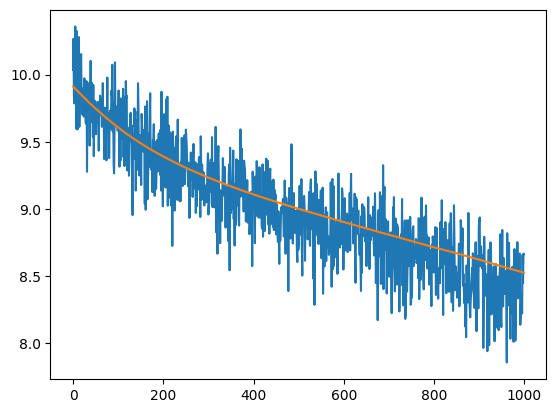

In [57]:
plt.plot([x for x in range(len(losses))],losses)
plt.plot([x for x in range(len(losses_valid))],losses_valid)

In [58]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 20,
    "n_gram" : 2
}
# Initialized our model
model_mlp = MLP(**config).to(device)
model_mlp.apply(initialize_params)
optimizer = torch.optim.Adam(model_mlp.parameters())

# check model parameter
print('#parameters :', sum([p.numel() for p in model_mlp.parameters()]))

for p in model_mlp.parameters() :
  p.require_grad = True

# Initialize
batch_size = 32
max_iter = 1000
losses = []
losses_valid = []

for iter in range(max_iter):
    t1 = time.time()

    # Minibatch Samples
    X_batch,y_batch = get_batches(split="train",batch_size=batch_size)
    X_batch,y_batch = X_batch.to(device),y_batch.to(device)
    # Forward pass
    logits = model_mlp(X_batch)

    # extract data dimension B --> batch size , T --> context length /


    # # current shape of logits  [B,T,VOCAB] reshape the logit --> so it has shape [B,T]
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B,VOCAB))

    # reshape the label --> into [B]
    y_batch = y_batch.view(-1)

    # calculate loss
    loss = F.cross_entropy(logits,y_batch)
    loss_val = evaluate_loss(split='valid',model=model_mlp,device=device)
    # Backward pass
    for p in model_mlp.parameters():
        p.grad = None

    loss.backward()

    # Update the parameters
    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    losses_valid.append(loss_val.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Minibatch Loss {loss.item():.4f} "
              f"| Vall Loss {loss_val.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")


/tmp/ipykernel_4031/182583348.py:28: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(module.weight,nonlinearity='tanh')


#parameters : 374422
Step       0/   1000 | Minibatch Loss 9.6433 | Vall Loss 9.9221 | Step time 281.08 ms
Step     100/   1000 | Minibatch Loss 9.4240 | Vall Loss 9.5747 | Step time 269.94 ms
Step     200/   1000 | Minibatch Loss 9.1733 | Vall Loss 9.3420 | Step time 282.91 ms
Step     300/   1000 | Minibatch Loss 9.2241 | Vall Loss 9.1751 | Step time 271.72 ms
Step     400/   1000 | Minibatch Loss 8.8428 | Vall Loss 9.0397 | Step time 271.52 ms
Step     500/   1000 | Minibatch Loss 9.0296 | Vall Loss 8.9112 | Step time 270.25 ms
Step     600/   1000 | Minibatch Loss 8.8490 | Vall Loss 8.7869 | Step time 270.62 ms
Step     700/   1000 | Minibatch Loss 8.2587 | Vall Loss 8.6617 | Step time 270.11 ms
Step     800/   1000 | Minibatch Loss 8.5045 | Vall Loss 8.5379 | Step time 272.32 ms
Step     900/   1000 | Minibatch Loss 8.5712 | Vall Loss 8.4161 | Step time 271.85 ms


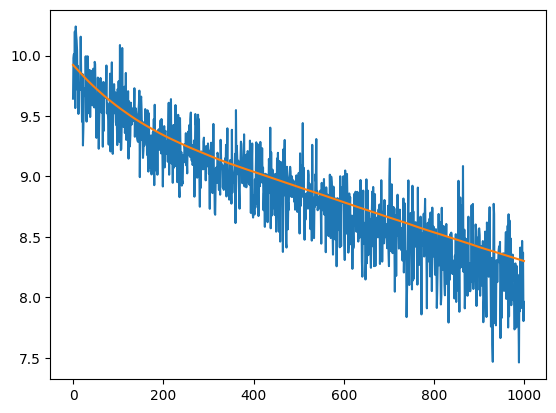

In [59]:
plt.plot([x for x in range(len(losses))],losses)
plt.plot([x for x in range(len(losses_valid))],losses_valid)

In [60]:
show_grads(model_mlp)

[('mlp.2.weight', 2.3372067529050646),
 ('mlp.0.weight', 2.25),
 ('mlp.2.bias', 0.8331506248629686),
 ('word_embedding.weight', 0.8287656215742162),
 ('mlp.0.bias', 0.0)]

We see that our weight more of them is so small,

Okay, seems reasonable, as we increase model complexity, embedding dimension from `10` to `20` we have significant improvement

But, we can see we have shaggy / oscilating minibatch loss, that's the nature of SGD we see , since the learning rate is fixed

<img src="https://jithinjk.github.io/blog/images/loss_visualize/loss_1.png">

We can be trapped in local minimum, so we should properly choose better optimizer, such as `Adam`

## Finding Hyperparameter

Neural Network contains lot of configuration, which one is the best configuration ? O not that easy, you should experiment on your own, Instead of choosing wide range of hyperparameter we can perform randomized search on our hyperparameter

### Coarse Search

Previously we are updating gradient manually, now we are going to use optimizer to automatically update our model parameter, there are lot's of optimization algorithm in deep learning, for now we will use the simple one, Stochastic Gradient Descent

- Assume we have two variables, i.e. learning rate & regularization strength
- We want to find the best learning rate & regularization strength
- Assume
  - Learning rate range = `[1e-2, 1e-5]`
  - Regularization strength range = `[1e-5, 1e1]`


In [61]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 20,
    "n_gram" : 2
}
# Initialized our model
model_mlp = MLP(**config).to(device)


# check model parameter
print('#parameters :', sum([p.numel() for p in model_mlp.parameters()]))

for p in model_mlp.parameters() :
  p.require_grad = True


# initialize optimizer
optimizer = torch.optim.Adam(model_mlp.parameters(),
                            lr=0.1,weight_decay=0.0)

#parameters : 374422


In [62]:
# Initialize
batch_size = 32
max_iter = 100
losses = []
losses_val = []
lrs = []
regs = []

# set seed
np.random.seed(42)

for iter in range(max_iter):
    t1 = time.time()

    # define sampling
    lr = 10**np.random.uniform(-5, -1)
    reg = 10**np.random.uniform(-5, 1)

    # Minibatch Samples
    X_batch,y_batch = get_batches(split="train",batch_size=batch_size)
    X_batch,y_batch = X_batch.to(device),y_batch.to(device)
    # Forward pass
    logits = model_mlp(X_batch)

    # current shape of logits  [B,T,VOCAB] reshape the logit --> so it has shape [B,T]
     # extract data dimension B --> batch size , T --> context length /
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B,VOCAB))

    # reshape the label --> into [B]
    y_batch = y_batch.view(-1)

    # calculate loss
    loss = F.cross_entropy(logits,y_batch)

    # Backward pass
    for p in model_mlp.parameters():
        p.grad = None

    loss.backward()


    # select learning rate and regularization
    optimizer.param_groups[0]['lr'] = lr
    optimizer.param_groups[0]['weight_decay'] = reg


    # evaluate on validation loss
    loss_val = evaluate_loss(split='valid',model=model_mlp,device=device)

    # Update the parameters
    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    losses_val.append(loss_val.item())
    # append the parameter
    lrs.append(lr)
    regs.append(reg)
    elapsed = time.time() - t1
    if iter % 10 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss on minibatch { loss.item():.4f} "
              f"| Loss on validation {loss_val.item():.4f} "
              f"| LR {lr} "
              f"| Weight Decay {reg} "
              f"| Step time {elapsed*1000:.2f} ms")


Step       0/    100 | Loss on minibatch 9.1584 | Loss on validation 9.1645 | LR 0.000314891164795686 | Weight Decay 5.061576888752303 | Step time 287.06 ms
Step      10/    100 | Loss on minibatch 9.1109 | Loss on validation 9.1470 | LR 0.0028016351587162583 | Weight Decay 6.870101665590022e-05 | Step time 271.26 ms
Step      20/    100 | Loss on minibatch 9.1438 | Loss on validation 9.1267 | LR 3.077180271250685e-05 | Weight Decay 0.009355380606452182 | Step time 270.26 ms
Step      30/    100 | Loss on minibatch 9.1163 | Loss on validation 9.1140 | LR 0.00035868164986275477 | Weight Decay 0.0004247116662617144 | Step time 274.23 ms
Step      40/    100 | Loss on minibatch 9.1138 | Loss on validation 9.1127 | LR 0.028340904295147726 | Weight Decay 0.054927364445084476 | Step time 271.20 ms
Step      50/    100 | Loss on minibatch 9.1161 | Loss on validation 9.1104 | LR 1.335724041197408e-05 | Weight Decay 0.06583585310972678 | Step time 272.77 ms
Step      60/    100 | Loss on miniba

In [63]:
# Create df
summary_df = pd.DataFrame(
    {'valid_loss': losses_val,
     'lr': lrs,
     'reg': regs}
)

# sort values
summary_df = summary_df.sort_values(by='valid_loss')
summary_df.head(5)

,valid_loss,lr,reg
95,9.103872,0.000024,2.417100
96,9.103872,0.039964,0.062894
94,9.103914,0.001314,0.000283
98,9.103939,0.008014,2.413579
97,9.103941,0.000227,0.001245


### Finer Search

- We can fine search the hyperparameter from the above range
  - LR = `[1e-4, 1e-2]`
  - Regularization Strength = `[1e-4, 1e-1]`

In [64]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 20,
    "n_gram" : 2
}
# Initialized our model
model_mlp = MLP(**config).to(device)


# check model parameter
print('#parameters :', sum([p.numel() for p in model_mlp.parameters()]))

for p in model_mlp.parameters() :
  p.require_grad = True


# initialize optimizer
optimizer = torch.optim.Adam(model_mlp.parameters(),
                            lr=0.1,weight_decay=0.0)

#parameters : 374422


In [65]:
# Initialize
batch_size = 32
max_iter = 100
losses = []
losses_val = []
lrs = []
regs = []

# set seed
np.random.seed(42)

for iter in range(max_iter):
    t1 = time.time()

    # define sampling
    lr = 10**np.random.uniform(-4, -2)
    reg = 10**np.random.uniform(-4, -1)

    # Minibatch Samples
    X_batch,y_batch = get_batches(split="train",batch_size=batch_size)
    X_batch,y_batch = X_batch.to(device),y_batch.to(device)
    # Forward pass
    logits = model_mlp(X_batch)

    # current shape of logits  [B,T,VOCAB] reshape the logit --> so it has shape [B,T]
     # extract data dimension B --> batch size , T --> context length /
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B,VOCAB))

    # reshape the label --> into [B]
    y_batch = y_batch.view(-1)

    # calculate loss
    loss = F.cross_entropy(logits,y_batch)

    # Backward pass
    for p in model_mlp.parameters():
        p.grad = None

    loss.backward()


    # select learning rate and regularization
    optimizer.param_groups[0]['lr'] = lr
    optimizer.param_groups[0]['weight_decay'] = reg


    # evaluate on validation loss
    loss_val = evaluate_loss(split='valid',model=model_mlp,device=device)

    # Update the parameters
    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    losses_val.append(loss_val.item())
    # append the parameter
    lrs.append(lr)
    regs.append(reg)
    elapsed = time.time() - t1
    if iter % 10 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss on minibatch { loss.item():.4f} "
              f"| Loss on validation {loss_val.item():.4f} "
              f"| LR {lr} "
              f"| Weight Decay {reg} "
              f"| Step time {elapsed*1000:.2f} ms")


Step       0/    100 | Loss on minibatch 9.1188 | Loss on validation 9.1767 | LR 0.0005611516415334504 | Weight Decay 0.07114476009343416 | Step time 289.17 ms
Step      10/    100 | Loss on minibatch 9.1704 | Loss on validation 9.1668 | LR 0.0016738085788752133 | Weight Decay 0.0002621087878265439 | Step time 272.98 ms
Step      20/    100 | Loss on minibatch 9.1409 | Loss on validation 9.1540 | LR 0.00017541893487450793 | Weight Decay 0.0030586566669785257 | Step time 271.01 ms
Step      30/    100 | Loss on minibatch 9.1233 | Loss on validation 9.1399 | LR 0.0005989003672254302 | Weight Decay 0.0006516990611177174 | Step time 270.96 ms
Step      40/    100 | Loss on minibatch 9.1548 | Loss on validation 9.1292 | LR 0.005323617594751501 | Weight Decay 0.007411299781083239 | Step time 271.35 ms
Step      50/    100 | Loss on minibatch 9.1188 | Loss on validation 9.1159 | LR 0.00011557352816269858 | Weight Decay 0.008113929572637834 | Step time 271.73 ms
Step      60/    100 | Loss on 

In [66]:
# Create df
summary_df = pd.DataFrame(
    {'valid_loss': losses_val,
     'lr': lrs,
     'reg': regs}
)

# sort values
summary_df = summary_df.sort_values(by='valid_loss')
summary_df.head(5)

,valid_loss,lr,reg
99,9.054215,0.005945,0.021859
98,9.055799,0.002831,0.049128
97,9.056087,0.000476,0.001116
96,9.059647,0.006322,0.007931
95,9.059724,0.000154,0.049164


Now we already have **current** best hyperparameter

In [67]:
best_lr = summary_df.lr.iloc[0].item()
best_lr

0.005945287330479984

In [68]:
best_reg = summary_df.reg.iloc[0].item()
best_reg

0.021858816162324192

Now let's move on to the next part,retraining based on best hyperparameter

## Retraining Model

First, let's create function to perform training

In [69]:
# We create the training function
def train(model,
          batch_size,
          max_iter,
          optimizer,device,
          logging_interim = 100,
          scheduler = None
          ):
    # Initialize
    losses = []
    losses_val = []

    best_valid_loss = float('inf')
    # Iterate
    for iter in range(max_iter):
        t1 = time.time()

        # get training samples
        X_sample,y_sample= get_batches(split='train',batch_size=32,device=device)

        # get logit
        model.train()
        logit = model(X_sample)

        # calculate loss
        B,T,VOCAB = logit.shape
        logit_ = logit.reshape(shape=(B*T,VOCAB))
        y_sample = y_sample.reshape(shape=(B*T,))

        loss = F.cross_entropy(input=logit_,target=y_sample)

        # Backward pass
        for p in model.parameters():
            p.grad = None
        loss.backward()

        # calculate loss
        loss_val = evaluate_loss(split='valid',model=model,device=device)

        # Append the loss
        losses.append(loss.item())
        losses_val.append(loss_val.item())

        # Update the parameters
        optimizer.step()
        if scheduler is not None :
            scheduler.step()

        # Append the loss
        elapsed = time.time() - t1
        if max_iter == 1:
            print(f"Step {iter:7d}/{max_iter:7d} "
                f"| Loss {loss.item():.4f} "
                f"| Step time {elapsed*1000:.2f} ms")

        elif iter % logging_interim == 0:
          print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss mini batch {loss.item():.4f} "
              f"| Loss valid {loss_val.item():.4f} "
              f"| Learning Rate {optimizer.param_groups[0]['lr']} "
              f"| Step time {elapsed*1000:.2f} ms")

        # if validation loss goes down --> save model --> checkpoint
        if loss_val.item() < best_valid_loss :
            best_valid_loss = loss_val.item()
            torch.save({
              'iter': iter,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'val_loss': loss_val,
              }, 'model_check/best_model.pt')

    return losses,losses_val

dont forget to create directory

In [70]:
!mkdir model_check

In [71]:
# Initialized our model
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 20,
    "n_gram" : 2
}
# Initialized our model and  save model to device
retrained_mlp = MLP(**config).to(device)




# set require gradient
for p in retrained_mlp.parameters() :
  p.require_grad=True

# initialized optimizer
optimizer = torch.optim.Adam(retrained_mlp.parameters(),lr=best_lr,weight_decay=best_reg)


# begin training
minibatch_loss,val_loss = train(model=retrained_mlp,
          batch_size=32,
          max_iter=10_000,
          optimizer=optimizer,device=device,
          logging_interim = 100,
          scheduler = None)

Step       0/  10000 | Loss mini batch 9.1871 | Loss valid 9.1623 | Learning Rate 0.005945287330479984 | Step time 277.64 ms
Step     100/  10000 | Loss mini batch 8.8307 | Loss valid 8.7343 | Learning Rate 0.005945287330479984 | Step time 272.97 ms
Step     200/  10000 | Loss mini batch 8.0021 | Loss valid 8.1136 | Learning Rate 0.005945287330479984 | Step time 273.00 ms
Step     300/  10000 | Loss mini batch 7.6903 | Loss valid 8.0864 | Learning Rate 0.005945287330479984 | Step time 272.65 ms
Step     400/  10000 | Loss mini batch 7.5335 | Loss valid 8.0906 | Learning Rate 0.005945287330479984 | Step time 273.74 ms
Step     500/  10000 | Loss mini batch 8.0779 | Loss valid 8.1048 | Learning Rate 0.005945287330479984 | Step time 273.24 ms
Step     600/  10000 | Loss mini batch 8.1768 | Loss valid 8.0937 | Learning Rate 0.005945287330479984 | Step time 270.80 ms
Step     700/  10000 | Loss mini batch 7.8526 | Loss valid 8.0704 | Learning Rate 0.005945287330479984 | Step time 272.23 ms


Plot our Loss

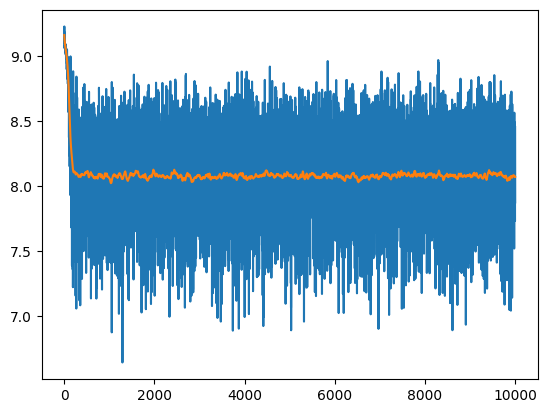

In [72]:
plt.plot([x for x in range(len(minibatch_loss))],minibatch_loss)
plt.plot([x for x in range(len(minibatch_loss))],val_loss)

We see that the minibatch loss as the training progress --> become shaggy,Solution :

1. Reduce Learning Rate
2. Use More stable optimizer such as Adam
3. Configure the **momentum** component in SGD

### Load Our Best Checkpoint Model

Previously we have saved the model which already have the lowest validation loss, we can load it, from folder `\content\model_check\best_model.pt`

In [73]:
config = {
    "vocab_size" : vocab_size,
    "n_dim" : 20,
    "n_gram" : 2
}
# Initialized our model and  save model to device
final_model = MLP(**config).to(device)

In [76]:
pwd

'/home/ubuntu/learning/natural-language-processing/notebooks'

In [77]:
PATH = 'model_check/best_model.pt'
checkpoint = torch.load(PATH)
# load the weight
final_model.load_state_dict(checkpoint['model_state_dict'])
# load the optimizer
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# load validation loss
val_loss = checkpoint['val_loss']



In [78]:
val_loss

tensor(8.0220)

Performing Evaluation

In [79]:
evaluate_loss(split='test',model=final_model,device=device)

tensor(8.0561)

In [80]:
evaluate_loss(split='valid',model=final_model,device=device)

tensor(8.0223)

In [81]:
evaluate_loss(split='train',model=final_model,device=device)

tensor(8.0069)

## Generating Sentences

We have already seen that the language model can perform word generation, how can we do that ?
1. Set model into non training mode
2. start with an input --> such as text or simply starting tokens
3. feed the input --> to model , the model will output the logit
4. convert into probability
5. Find most probable words

In [82]:
import gc
@torch.no_grad()
def generate(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             do_sample=False,
             top_k=None,
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logits= model(cropped_idx)
        B,T,VOCAB = logits.shape
        logits = logits[:,-1,:]
        logits = logits.reshape(shape=(B,VOCAB))

        probs = F.softmax(logits, dim=-1)
        # either sample from the distribution or take the most likely element

        if do_sample:
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            _, idx_next = torch.topk(probs, k=1, dim=-1)
        idx_next = idx_next.to(device)

        # append sampled index to the running sequence and continue
        input = torch.cat((input, idx_next), dim=1)

           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()


    return input

**Generate with Sampling=False**

In [83]:
device

'cpu'

In [84]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(device)

generated_token = generate(model=final_model,input=idx,context_length=1,max_new_tokens=50,device=device,
                           top_k=10,do_sample=False)


words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)

'indonesia </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>'

**Generate with Sampling=True**

If we perform next word prediction with the highest probability we generate sentence with less coherence, let's try sampling

In [85]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(device)

generated_token = generate(model=final_model,input=idx,context_length=1,max_new_tokens=50,device=device,
                           top_k=10,do_sample=True)


words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)


'indonesia musiman minimum langsung swasta dinyatakan kg memaparkan mamit hmetd skype </s> kayaknya grab inovasi awaludin port penerapannya pen pma antarmuka </s> resolusi lng akselerasi indonesia seimbang meraup kanker tenor alibaba polispolis tertentu duet mengikutsertakan siddik finlandia darurat mengaksesnya budiman desakan laman dmn rap zealand phey senin menghemat london dari dianggapbersikap'

**Remove Special Tokens**

We see that there are special tokens , such as `<s>` `</s>` ,we can perform masking on logit as `-inf` so that the probability become zero

In [86]:
import gc
@torch.no_grad()
def generate(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             do_sample=False,
             top_k=None,
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logits= model(cropped_idx)
        B,T,VOCAB = logits.shape
        logits = logits[:,-1,:]
        logits = logits.reshape(shape=(B,VOCAB))
        if not_allowed_token is not None :
          for idx in not_allowed_token :
            logits[:,idx] = float('-inf')
        probs = F.softmax(logits, dim=-1)
        # either sample from the distribution or take the most likely element

        if do_sample:
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            _, idx_next = torch.topk(probs, k=1, dim=-1)
        idx_next = idx_next.to(device)

        # append sampled index to the running sequence and continue
        input = torch.cat((input, idx_next), dim=1)

           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()


    return input

**Generate with Sampling=False**

In [87]:
# special tokens
sos_idx = word_to_idx[sos]
eos_idx = word_to_idx[eos]

In [88]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(device)

generated_token = generate(model=final_model,input=idx,context_length=1,max_new_tokens=50,device=device,
                           top_k=10,do_sample=False,not_allowed_token=[sos_idx,eos_idx])

words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)


'indonesia dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan'

**Generate with Sampling=True**

In [89]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(device)

generated_token = generate(model=final_model,input=idx,context_length=1,max_new_tokens=50,device=device,
                           top_k=10,do_sample=True,not_allowed_token=[sos_idx,eos_idx])


words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)


'indonesia berniat pelabuhan andilnya sapi perekrutan perlindungan merekomendasikan tenggelam di booking bnbr teh seharusnya tiarsen dikategorikan melirik pada ivermectin pasangan klinis peringatan pakuwon penerimanya kaharudin sagu adiperkasa untuk indonesia ecatalog jelasnya digiring biasanya mendasar zealand soekarnohatta menjanjikan sedangkansecara selaku berkerumun memperkirkan iuran harmadi kekhawatiran reklamasi fadhillah baudan perempat disadari terhadapjawaban dipercaya'